#L1 Regularization (Lasso Regression)
## $J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \left| \theta_i \right| $

The reason why Lasso regression is called the L1 regularization is because it puts the l1 norm  of the weight vector. 

Note: That the bias term $\theta_0$ is not regularized (we start with the i = 1)

The regularization term is added to the cost function only during the training time. However, when we want to evaluate the performance of the model we use the unregularized form. The $\alpha$ controls how much we want to regularize the model. $\alpha$ = 0 will make the model to linear regression.



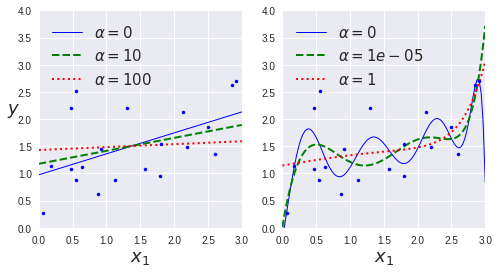

In [6]:
#  The complete code is at (https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)

from sklearn.linear_model import Ridge
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures



np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

#L1 Regularization (Lasso Regression)
## $J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \left| \theta_i \right| $

The reason why Lasso regression is called the L1 regularization is because it puts the l1 norm  of the weight vector. 

Note: That the bias term $\theta_0$ is not regularized (we start with the i = 1)

The regularization term is added to the cost function only during the training time. However, when we want to evaluate the performance of the model we use the unregularized form. The $\alpha$ controls how much we want to regularize the model. $\alpha$ = 0 will make the model to linear regression.

An interesting thing about Lasso Regression is it atuomatically does feature selection for us. Lasso Regression tends to completely eliminate the weights of the least important features

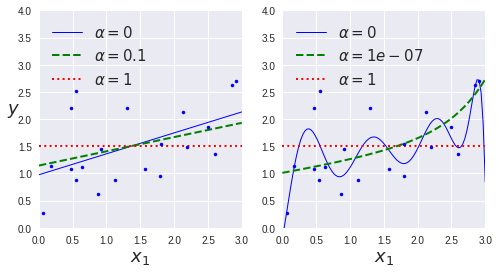

In [9]:
#  The complete code is at (https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)


plt.show()

In [11]:
#  The complete code is at (https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)

# Performing Lasso with Sk-learn
#  Since lasso is non-differentiable at theta = 0 
#  You can use a subgradient vector (the piecewise derivative of the absolute value)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [12]:
#  The complete code is at (https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)


# Elastic net is a middle ground between the Lasso and Ridge
#  r =0 in Elastic net = Ridge
#  r = 1 --> Lasso

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])